In [3]:
# Cross-notebook include shim
with open("nbinclude.ipynb") as nbinclude_f: # don't rename nbinclude_f
    import IPython.nbformat.current
    get_ipython().run_cell(IPython.nbformat.current.read(nbinclude_f, 'json').worksheets[0].cells[0].input)

In [4]:
nbinclude('Narwhal')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
n0 = Narwhal(0)
n1 = Narwhal(1)

In [7]:
Narwhal.all_narwhals

{0: <Narwhal.Narwhal instance at 0x7fd2b4343680>,
 1: <Narwhal.Narwhal instance at 0x7fd2b43436c8>}

In [8]:
n0.drive(10,0)

In [9]:
n0.drive(0,0)

In [11]:
from IPython.html.widgets import interact
@interact(l=(-1.0,1.0,0.05), r=(-1.0,1.0,0.05))
def drive(l=0.,r=0.):
    n0.drive(l,r)

In [12]:
while True:
    n0.neck_servo.tick()
    time.sleep(.01)

KeyboardInterrupt: 

In [13]:
targets0 = np.linspace(2*math.pi, 0)
targets1 = np.linspace(0, 2*math.pi)
while True:
    for target in targets0:
        n0.set_neck(target)
        for i in range (10):
            n0.neck_servo.tick()
            time.sleep(.01)
    for target in targets1:
        n0.set_neck(target)
        for i in range (10):
            n0.neck_servo.tick()
            time.sleep(.01)

KeyboardInterrupt: 

In [15]:
@interact(vel=(-1.0,1.0,0.05))
def neck_speed(vel):
    n0.set_neck_vel(vel)

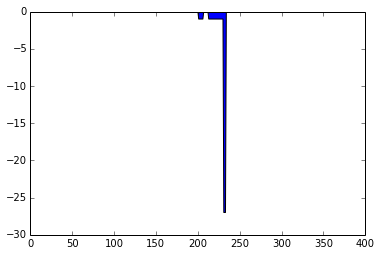

In [17]:
img = np.array(n0.get_linescan())
xs = np.arange(0, img.shape[0])
plt.fill_between(xs, 0, img)

In [19]:
angle = math.pi/5.
center = img.shape[0]/2
while True:
    img = np.array(n0.get_linescan())
    com = scipy.ndimage.measurements.center_of_mass(img)[0]
    if com is not np.nan:
        error = center - com
        angle = angle + ( .001 * error)
        n0.set_neck(angle)
        IPython.display.clear_output()
        print com, angle
    sys.stdout.flush()
    n0.neck_servo.tick()
    time.sleep(.01)

194.5 0.281335849409


KeyboardInterrupt: 

<matplotlib.colorbar.Colorbar instance at 0x7fd2b37907a0>

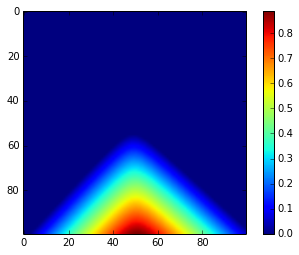

In [20]:
xs = np.linspace(-1.0, 1.0, 100)
ys = np.linspace(-1.0, 1.0, 100)
img=np.ndarray(shape=(len(ys), len(xs)), dtype=float)
for i in xrange(len(xs)):
    for j in xrange(len(ys)):
        x = xs[i]
        y = ys[j]
        img[i][j] = n0.lightval((x,y,0), 10., 10.)
plt.imshow(img)
plt.colorbar()